In [ ]:
# 순환 신경망(Recurrent Neural Network, RNN)
# 순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억 해 놓는
# 방법이다. 그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어
# 간다. 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼
# 보인다. 이렇게 같은 층 안에서 맴도는 성질 때문에 순환 신경망이라고 부른다.

# LSTM(Long Short Term Memory)
# RNN이 처음 개발된 이후, RNN의 결과를 더욱 개선하기 위한 노력이 계속되어 왔다.
# 이 중에서 LSTM(Long Short Term Memory, 장단기 기억 네트워크) 방법을 함께 사용하는
# 기법이 현재 가장 널리 사용되고 있습니다.
# LSTM은 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실
# 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법입니다.
# 즉, 반복되기 직젂에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더
# 추가하는 것입니다.

# LSTM은 기억 값의 가중치를 관리하는 장치


[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13, 4, 346, 48, 235, 62

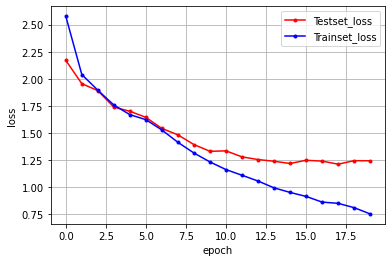

In [5]:
# LSTM을 이용한 로이터 뉴스 카테고리 분류

# 케라스에서 제공하는 로이터 뉴스 데이터는 총 11,258개의 뉴스 기사가 46개의 카테고리로
# 나눠진 대용량의 텍스트 데이터이다.

# LSTM 알고리즘을 이용해서 로이터 뉴스 카테고리 분류를 해보자

# 중부 지방은 대체로 맑겠으나, 남부 지방을 구름이 많겠습니다. --> 날씨
# 올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다. --> 주식
# 이번 선거에서는 누가 이길 것 같아? --> 정치
# 퍼셉트론의 한계를 극복한 신경망이 다시 뜨고 있대. --> 딥러닝

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋, 데이터셋으로 나누기: 훈련 데이터: 80%, 테스트 데이터: 20%
# num_words=1000: 빈도수가 1~ 1000에 해당하는 단어만 선택해서 불러오기
# test_split=0.2: 테스트 데이터 20%로 분할
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
print(X_train)      # 훈련 데이터 단어의 빈도수
print(Y_train)      # 뉴스 카데고리 번호

# 데이터 확인하기
category = np.max(Y_train) + 1    # 뉴스 카테고리 갯수 구하기(0부터 시작하기 때문에 1을 더함)
print(category,'카테고리')        # 46 카테고리
print(len(X_train), '학습용 뉴스 기사')   # 8982 학습용 뉴스 기사 : 80%
print(len(X_test), '테스트용 뉴스 기사')  # 2246 테스트용 뉴스 기사 : 20%
print(X_train[0])   # [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111,..]

# 데이터 전처리
# 각 기사의 단어 수가 제각각 다르므로 동일하게 맞춤
# maxlen=100 : 단어수를 100개로 맞춤
# 단어수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림
# 단어수가 100에서 모자랄 때는 모자라는 부분을 모두 0으로 채움
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

# 원핫인코딩 처리
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

# 모델의 설정
model = Sequential()

# Embedding층은 데이터 전처리 과정을 통해 입력된 값을 받아
# 다음 층이 알아들을 수 있는 형태로 변환하는 역할
# Embedding('불어온 단어의 총 개수', '기사당 단어 수')
model.add(Embedding(1000, 100))

# RNN에서 기억 값에 대한 가중치를 제어하는 역할
# LSTM('기사당 단어 수', 활성화 함수)
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))    # 출력층: 다중 분류(46개) softmax함수

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 데이터의 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 선 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')   # 범례
plt.grid()            # 격자 모양 출력
plt.xlabel('epoch')   # x축 라벨
plt.ylabel('loss')    # y축 라벨
plt.show()

# 실행 결과
Test Accuracy: 0.7039





훈련용 리뷰 개수: 25000
테스트용 리뷰 개수: 25000
카테고리: 2
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 598,165
Trainable params: 598,165
Non-trainable params: 0
_____

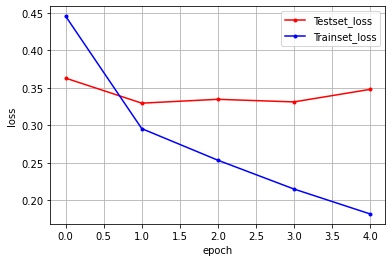

In [10]:
# LSTM과 CNN을 이용한 영화 리뷰 분류하기

# 인터넷 영화 데이터베이스(Internet Movie Database, IMDB) 영화와 관련된 정보와 출연자 정보,
# 개봉 정보, 영화 후기, 평점에 이르기 까지 매우 폭 넓은 데이터가 저장된 자료이다.
# 영화에 관해 남긴 2만 5000여 개의 영화 리뷰가 담겨 있으며, 해당 영화를 긍정적으로 평가
# 했는지 혹은 부정적으로 평가 했는지도 담겨 있다.

# 클래스가 긍정 또는 부정 두 가지 뿐이라서 원핫인코딩 과정은 없다.
# : 출력층에서 sigmoid 함수 사용

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

# IMDB데이터 불러오기
# 훈련 데이터와 테스트 데이트의 비율을 지정하지 않으면 50 : 50 비율로 제공핚다.
# IMBB데이터에서는 비율을 조절하는 test_split 옵션을 지원하지 않는다.
# num_words=5000 : 빆도수가 1 ~ 5000에 해당하는 단어만 선택해서 불러오기
# 영화 리뷰는 x_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 x_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

print('훈련용 리뷰 개수: {}'.format(len(x_train)))   # 훈련용 리뷰 개수: 25000
print('테스트용 리뷰 개수: {}'.format(len(x_test))) # 테스프용 리뷰 개수 25000
num_classes = max(y_train) + 1
print('카테고리: {}'.format(num_classes))           # 카테고리: 2(긍정, 부정)

# 데이터 전처리
# 영화 리뷰의 단어 수가 제각각 다르므로 동일하게 맞춤
# maxlen=100: 단어수를 100개로 맞춤
# 단어수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림
# 단어수가 100에서 모자랄 때는 모자라는 부분을 모두 0으로 채움
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델의 설정
model = Sequential()

# Embedding층은 데이터 전처리 과정을 통해 입력된 값을 받아
# 다음 층이 알아들을 수 있는 형태로 변환하는 역할
# Embedding('불러온 단어의 총 개수', '리뷰당 단어 수')
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))           # 무작위로 50% 노드를 끈다(과적합 방지)

# 합성곱층: 텍스트는 1차원 Conv1D(필터의 수, 마스크 크기)
# 1차원 배열에 가중치(마스크)를 각각 곱하여 컨볼루션층을 만든다.
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))

# MaxPooling층: 1차원
# pool_size=4: ex) 1, 4, 3, 2 ---> 4, 3
model.add(MaxPooling1D(pool_size=4))

# RNN에서 기억 값에 대한 가중치를 제어하는 역할
# LSTM('리뷰당 단어의 수')
model.add(LSTM(100))
# model.add(Dense(1))               # 출력층
# model.add(Activation('sigmoid'))  # 출력층: 이중분류(긍정, 부정)
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',   # 이중분류
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test, y_test)[1]))

# 데스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 선 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right') # 범례
plt.grid() # 격자 모양 출력
plt.xlabel('epoch') # x축 라벨
plt.ylabel('loss') # y축 라벨
plt.show()

# 실행 결과
# Test Accuracy: 0.8542
